<a href="https://colab.research.google.com/github/kushal-ks/PNM-ML-POC/blob/master/pnm_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import zipfile
import csv
import os
import math

print(tf.__version__)

2.2.0-rc2


In [0]:
local_zip = './pnm_data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data/')
zip_ref.close()

In [112]:
path = "./data/"
parent_dir_list = os.listdir(path) 
modem_data = {}
min_date_time = ''
max_date_time = ''
min_mr_lavel = ''
max_mr_lavel = ''
record_id = 0

print(type(min_date_time))
print(parent_dir_list)
for pl_num, pl in enumerate(parent_dir_list):
    modem_list_path = "./"+pl
    modem_list_dir = os.listdir(modem_list_path) 
    
    for ml_num, ml in enumerate(modem_list_dir):
      detail_file_path = modem_list_path+"/"+ml
      detail_file_list = os.listdir(detail_file_path)
      record_id = 0
      for key in detail_file_list:
          with open(detail_file_path+"/"+str(key)) as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            next(reader)

            modem_detail_list = []
            for row in reader:
              record_id += 1
              poll_date = datetime.strptime(str(row[3]), '%Y-%m-%d %H:%M:%S.%f')

              if (pl_num == 0 and ml_num == 0 or poll_date > max_date_time) :
                max_date_time = poll_date
              
              if (pl_num == 0 and ml_num == 0 or poll_date < min_date_time):
                min_date_time = poll_date

              if (pl_num == 0 and ml_num == 0 or float(row[39]) > max_mr_lavel):
                max_mr_lavel = math.ceil(float(row[39]))
              
              if (pl_num == 0 and ml_num == 0 or float(row[39]) < min_mr_lavel):
                min_mr_lavel = math.ceil(float(row[39]))
         
              modem_detail_list.append({"id": record_id, "mr_lavel": math.ceil(float(row[39])), "poll_time": row[3], "worst_severity": row[len(row) - 1]})
              modem_data[ml] = modem_detail_list
day_difference = max_date_time - min_date_time
print(day_difference.days)
print(max_mr_lavel)
print(min_mr_lavel)
print(max_date_time)
print(min_date_time)
print(modem_data)
              

<class 'str'>
['cmts_1', 'cmts_2']
39
0
-37
2019-08-18 16:00:52.032000
2019-07-10 04:41:20.603000
{'ec086bc6fb06': [{'id': 129, 'mr_lavel': -21, 'poll_time': '2019-07-14 05:47:31.601', 'worst_severity': 'immediateActionRequired'}, {'id': 130, 'mr_lavel': -20, 'poll_time': '2019-07-14 05:41:41.666', 'worst_severity': 'immediateActionRequired'}, {'id': 131, 'mr_lavel': -20, 'poll_time': '2019-07-14 05:36:21.706', 'worst_severity': 'immediateActionRequired'}, {'id': 132, 'mr_lavel': -21, 'poll_time': '2019-07-14 04:00:11.440', 'worst_severity': 'immediateActionRequired'}, {'id': 133, 'mr_lavel': -21, 'poll_time': '2019-07-13 22:00:11.642', 'worst_severity': 'immediateActionRequired'}, {'id': 134, 'mr_lavel': -21, 'poll_time': '2019-07-13 16:00:11.488', 'worst_severity': 'immediateActionRequired'}, {'id': 135, 'mr_lavel': -21, 'poll_time': '2019-07-13 10:00:11.665', 'worst_severity': 'immediateActionRequired'}, {'id': 136, 'mr_lavel': -21, 'poll_time': '2019-07-13 04:00:11.625', 'worst_sev

In [0]:
def plot_series(time, series, key, format='-', start=0, end=None):
  plt.plot(time[start:end], series[start:end], format)

In [0]:
def configure_chart():
  plt.figure(figsize=(20, 10))
  plt.xlabel("Pool Time")
  plt.ylabel("MR Lavel")
  plt.axis([0, day_difference.days, min_mr_lavel, max_mr_lavel]) 
  plt.grid(True)

# New Section

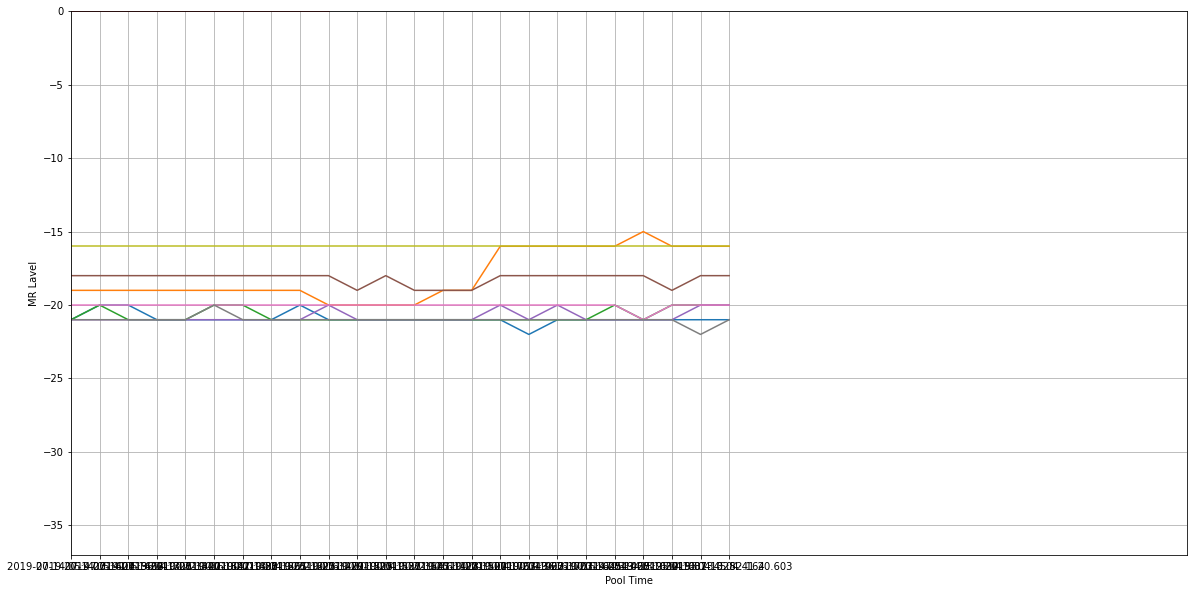

In [115]:
configure_chart()
counter = 0

for key in modem_data.keys():
  counter = counter + 1 
  mr_lavels = []
  poll_times = []
  data = modem_data[key]

  for item in data:
    mr_lavels.append((item["mr_lavel"]))
    poll_times.append(item["poll_time"])
  
  if counter < 10:
    series = np.array(mr_lavels)
    time = np.array(poll_times)
    plot_series(time, series, key)


